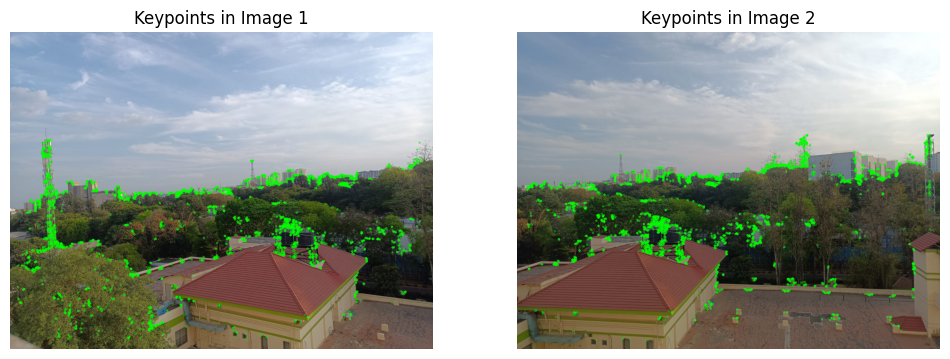

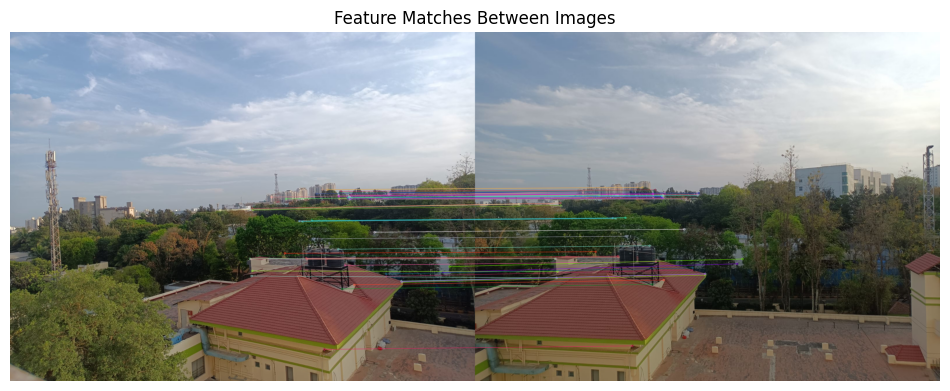

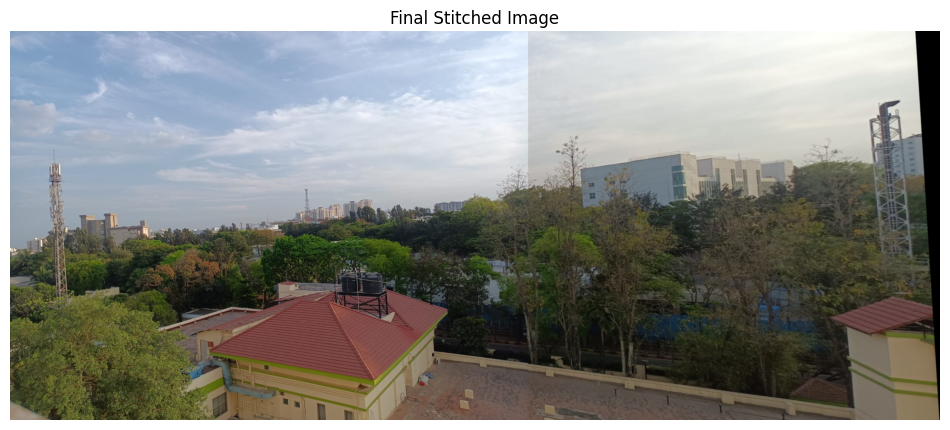

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread("image1_q2.jpg")  # Left image
image2 = cv2.imread("image2_q2.jpg")  # Right image

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=5000)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

image1_kp = cv2.drawKeypoints(image1, kp1, None, color=(0, 255, 0), flags=0)
image2_kp = cv2.drawKeypoints(image2, kp2, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoints in Image 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoints in Image 2")
plt.axis("off")
plt.show()

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

match_img = cv2.drawMatches(image1, kp1, image2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("Feature Matches Between Images")
plt.axis("off")
plt.show()

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

h1, w1 = image1.shape[:2]
h2, w2 = image2.shape[:2]

warped_image = cv2.warpPerspective(image2, H, (w1 + w2, max(h1, h2)))
warped_image[0:h1, 0:w1] = image1 
gray_warped = cv2.cvtColor(warped_image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])
final_stitched = warped_image[y:y+h, x:x+w]
final_stitched = cv2.cvtColor(final_stitched, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.imshow(final_stitched)
plt.axis("off")
plt.title("Final Stitched Image")
plt.show()

cv2.imwrite("final_stitched_output.jpg", cv2.cvtColor(final_stitched, cv2.COLOR_RGB2BGR))
